# Sentiment Analysis

In [42]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
pd.options.mode.chained_assignment = None 

nltk.download('vader_lexicon')
sent_analyzer = SentimentIntensityAnalyzer()

sentence = "i like cats"
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(sentence)

[nltk_data] Downloading package vader_lexicon to C:\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

In [43]:
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^A-Za-z]+', ' ', text).lower().strip()
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stop words
    words = [word for word in words if word not in stopwords.words('english')]
    
    # Join the words back into a cleaned string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

In [45]:
df = pd.read_csv('evaluation comments.csv')

df['cleaned_comments'] = df['Comments'].apply(clean_text)

df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Comments          209 non-null    object
 1   cleaned_comments  209 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB


,Comments,cleaned_comments
0,This medical student demonstrated excellent pr...,medical student demonstrated excellent problem...
1,They remained calm and composed under pressure...,remained calm composed pressure working diffic...
2,This medical student showed excellent critical...,medical student showed excellent critical thin...
3,They were able to prioritize tasks effectively...,able prioritize tasks effectively managing tim...
4,This medical student showed excellent communic...,medical student showed excellent communication...
...,...,...
204,"Demonstrates solid PBLI skills, but could bene...",demonstrates solid pbli skills could benefit e...
205,"Is proficient in PBLI, but needs to work on de...",proficient pbli needs work developing inquisit...
206,"Shows promise in terms of PBLI, but could bene...",shows promise terms pbli could benefit exposur...
207,Demonstrates a good understanding of PBLI prin...,demonstrates good understanding pbli principle...


In [46]:
def format_output(output_dict):
  
  polarity = "neutral"

  if(output_dict['compound']>= 0.05):
    polarity = "positive"

  elif(output_dict['compound']<= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  output_dict =  sent_analyzer.polarity_scores(text)
  return format_output(output_dict)

In [47]:
df["vader_prediction"] = df['Comments'].apply(predict_sentiment)

In [48]:
df.head()

,Comments,cleaned_comments,vader_prediction
0,This medical student demonstrated excellent pr...,medical student demonstrated excellent problem...,positive
1,They remained calm and composed under pressure...,remained calm composed pressure working diffic...,neutral
2,This medical student showed excellent critical...,medical student showed excellent critical thin...,positive
3,They were able to prioritize tasks effectively...,able prioritize tasks effectively managing tim...,positive
4,This medical student showed excellent communic...,medical student showed excellent communication...,positive


In [49]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

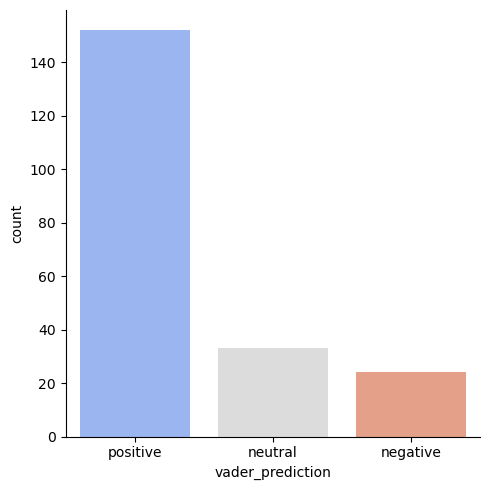

In [50]:
# diverging_colors = sns.color_palette("coolwarm", as_cmap=True)

sns.catplot(data=df, x="vader_prediction", kind="count", palette="coolwarm", order=["positive", "neutral", "negative"])
plt.show()